<a href="https://colab.research.google.com/github/fwalterjames/GH_collab/blob/main/dataviz_sounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!unzip sounds.zip

Archive:  sounds.zip
replace sounds/1_george_12.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sounds/1_george_12.wav  
replace sounds/1_jackson_8.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sounds/1_jackson_8.wav  
  inflating: sounds/1_lucas_26.wav   
  inflating: sounds/1_nicolas_18.wav  
  inflating: sounds/1_yweweler_11.wav  
  inflating: sounds/3_george_46.wav  
  inflating: sounds/3_jackson_27.wav  
  inflating: sounds/3_lucas_49.wav   
  inflating: sounds/3_lucas_5.wav    
  inflating: sounds/3_yweweler_4.wav  
  inflating: sounds/9_george_22.wav  
  inflating: sounds/9_jackson_44.wav  
  inflating: sounds/9_lucas_6.wav    
  inflating: sounds/9_nicolas_16.wav  
  inflating: sounds/9_yweweler_8.wav  


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import glob
import os.path
import random

In [14]:
soundfile_1 = wave.open('sounds/1_george_12.wav', 'r')
print(soundfile_1)

In [15]:
buf = soundfile_1.readframes(-1)

In [16]:
data_1 = np.frombuffer(buf, 'int16')

In [17]:
rate_1 = soundfile_1.getframerate()

In [18]:
xValues_1 = np.linspace(start=0,
                        stop=len(data_1)/rate_1,
                        num=len(data_1))

Text(0, 0.5, 'amp')

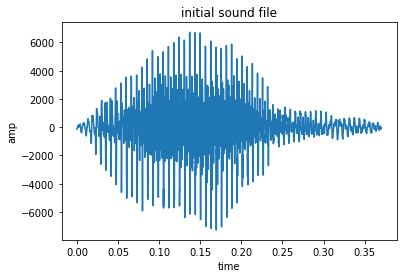

In [19]:
plt.plot(xValues_1, data_1)
plt.title('initial sound file')
plt.xlabel('time')
plt.ylabel('amp')

Text(0.5, 1.0, 'SPECTOGRAM')

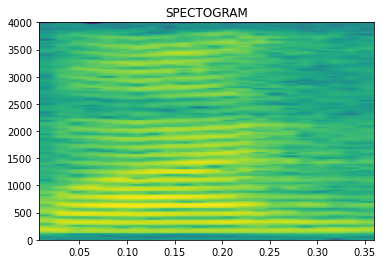

In [20]:
plt.specgram(data_1, Fs=rate_1)
plt.title('SPECTOGRAM')

In [21]:
def getSoundData(sf):
    data = sf.readframes(-1)
    data = np.frombuffer(data, 'int16')
    rate = sf.getframerate()
    timescale = np.linspace(start=0,
                            stop=len(data)/rate,
                            num=len(data))
    return (timescale, data)

In [22]:
# a python list to store our collection of sound file data
sound_files_datas = []
# use glob to import all the sounds from the sounds folder
# then loop over each sound and add the data to our list
for file in glob.glob('sounds/*.wav'):
    soundfile = wave.open(file, 'r')
    sound_files_datas.append(getSoundData(soundfile))

print(len(sound_files_datas))

15


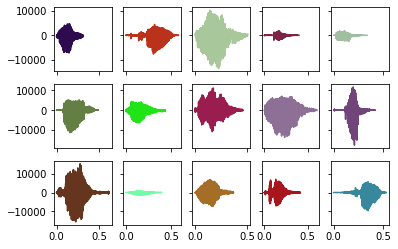

In [23]:
#declare the number of rows and columns we want, which is 3 rows with 5 columns. 
rows, cols = 3, 5

#pass those values into plt.subplots(), and unpack the tuple that is returned into the variables fig and ax

fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row')

#fig is overall figure/plot; each ax is one frame of the overall plot

rowCount = 0
colCount = 0

#use a for loop to iterate through sound_file_datas, which contains a list of tuples

for sf_data in sound_files_datas:
    timescale, data = sf_data
    ax[rowCount, colCount].plot(timescale, data, c=(
        random.random(), random.random(), random.random()))
    if colCount < 4:
        colCount += 1
    else:
        rowCount += 1
        colCount = 0

#Inside the for loop body, we access the timescale and data from each sf_data tuple, again using tuple unpacking.
#pass the timescale and data into the appropriate ax, using the values rowCount and colCount (initialized as 0 and 0), and create the plot for that frame

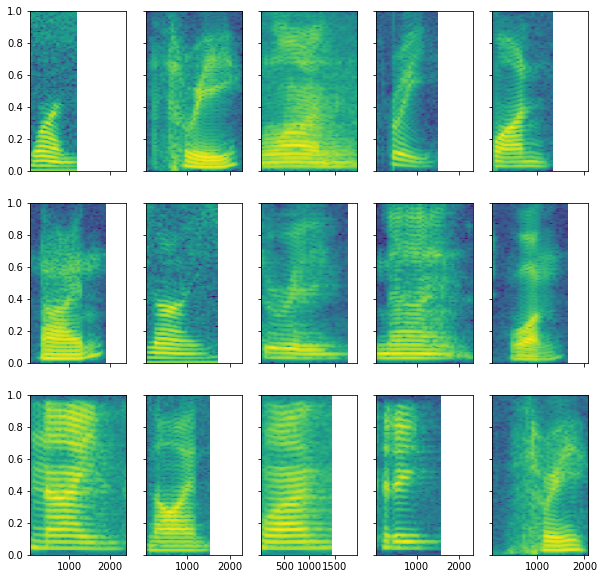

In [24]:
#spectogram version

rows, cols = 3, 5
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row')
fig.set_size_inches(10, 10)
rowCount = 0
colCount = 0

for sf_data in sound_files_datas:
    timescale, data = sf_data
    ax[rowCount, colCount].specgram(data, Fs = 2)

    if colCount < 4:
        colCount += 1
    else:
        rowCount += 1
        colCount = 0